In [ ]:
from pandas import read_csv
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
import matplotlib
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from dateutil.parser import parse

: 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
series = read_csv('../datasets/caseIIIjx75T_production_record_first.csv', header=0, parse_dates=[0], index_col=0, squeeze=0)

In [4]:
print(series.head())

        sales
Month        
1-Jun  3879.3
2-Jun   991.6
3-Jun  6076.9
4-Jun  2452.2
5-Jun  2003.3


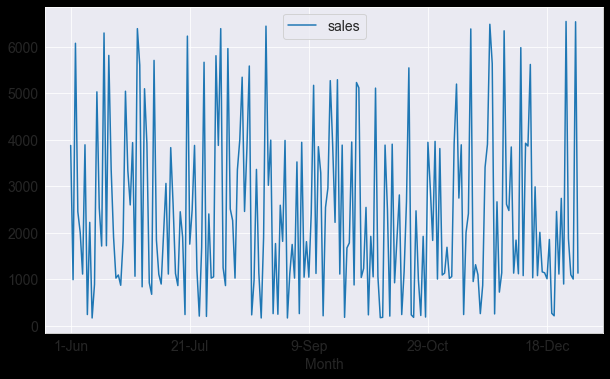

In [5]:

series.plot()
pyplot.show()

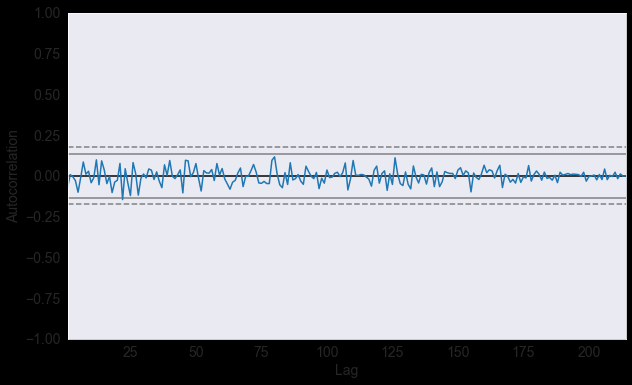

In [6]:
autocorrelation_plot(series)
pyplot.show()

In [7]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be

In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  214
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1919.925
Date:                Fri, 07 Oct 2022   AIC                           3851.849
Time:                        10:11:23   BIC                           3872.017
Sample:                             0   HQIC                          3860.000
                                - 214                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8601      0.076    -11.308      0.000      -1.009      -0.711
ar.L2         -0.6404      0.085     -7.536      0.000      -0.807      -0.474
ar.L3         -0.4596      0.092     -4.992      0.0

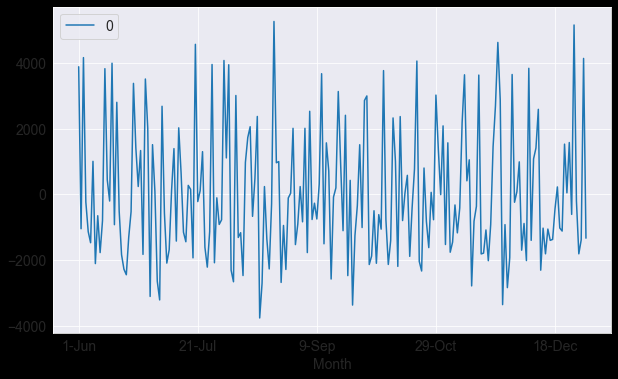

In [9]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

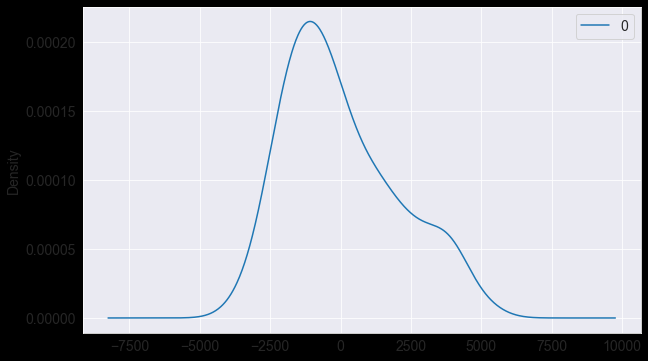

In [10]:
residuals.plot(kind = 'kde')
pyplot.show()

In [11]:
print(residuals.describe())

                 0
count   214.000000
mean     26.493292
std    2005.829146
min   -3755.517337
25%   -1446.444294
50%    -412.175143
75%    1389.790052
max    5255.569670


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [14]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predcited=%f, expected=%f' % (yhat, obs))
          

predcited=1852.322143, expected=2673.300000
predcited=1436.862615, expected=5547.600000
predcited=2095.573770, expected=234.500000
predcited=2383.383008, expected=180.900000
predcited=2092.522068, expected=2472.300000
predcited=1990.042058, expected=991.600000
predcited=1854.589002, expected=221.100000
predcited=1630.644531, expected=1922.900000
predcited=1013.159703, expected=187.600000
predcited=989.971065, expected=3946.300000
predcited=1396.319783, expected=2954.700000
predcited=1592.766848, expected=1835.800000
predcited=2037.381611, expected=3966.400000
predcited=2485.086127, expected=1005.000000
predcited=2462.709266, expected=3812.300000
predcited=2836.787986, expected=1092.100000
predcited=2483.373903, expected=1132.300000
predcited=2305.996784, expected=1688.400000
predcited=1983.705174, expected=1018.400000
predcited=1632.758362, expected=1058.600000
predcited=1553.849748, expected=3906.100000
predcited=1448.006573, expected=5199.200000
predcited=2172.304452, expected=2747.0

In [15]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 2056.263


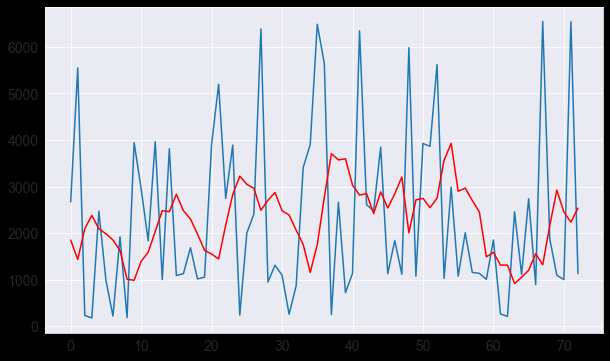

In [16]:
pyplot.plot(test)
pyplot.plot(predictions, color ='red')
pyplot.show()